In [1]:
# Import Library Dependencies
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

# Import Custom API Functions
from apidata import quandl_stock_data

%matplotlib notebook

In [2]:
pfolio_assets = [
    "PFE",
    "AMD",
    "JPM",    
]


In [ ]:
# Portfolio Stock Selection
pfolio_assets = [
    "NLY", 
    "T", 
    "AMZN", 
    "PG", 
    "BAC", 
    "PFE", 
    "FCX", 
    "MSFT", 
    "GM", 
    "QCOM",
]

print(f'Number of Portfolio Assets: {len(pfolio_assets)}')

In [3]:
# Initializing DataFrame
portfolio = quandl_stock_data(pfolio_assets[0], verbose=True) \
            .rename(columns={"Close": pfolio_assets[0].upper()})[pfolio_assets[0].upper()] \
            .reset_index()


[Quandl] Query API Summary:

--------------------------------------------------------------------------- 

- symbol: PFE
- start_date: 2014-01-01
- end_date: 2019-01-01
- collapse: monthly
- data_type: pandas

 --------------------------------------------------------------------------- 


[Preview] Response DataFrame


              Open    High     Low  Close      Volume
Date                                                
2014-01-02  30.47  30.600  30.330  30.46  17425300.0
2014-01-03  30.39  30.830  30.380  30.52  15035400.0
2014-01-06  30.77  30.950  30.530  30.55  23961500.0
2014-01-07  30.86  31.020  30.740  30.74  22223000.0
2014-01-08  30.78  30.985  30.650  30.95  22923200.0
2014-01-09  31.08  31.120  30.605  30.93  20581500.0
2014-01-10  30.84  30.950  30.500  30.69  21718100.0
2014-01-13  30.86  31.030  30.440  30.54  23981400.0
2014-01-14  30.58  31.050  30.550  31.00  32976600.0
2014-01-15  31.05  31.310  30.850  31.18  28816800.0 

---------------------------------------

In [4]:
# Generate Portfolio DataFrame:
# [1] Query Stock Return Data - Quandl API Call
# [2] Merge Stock Returns into Portfolio DataFrame 

for i, stock in enumerate(pfolio_assets[1:]):
    print(f"<Quandl API Call> [{i+1}] Stock Symbol: {stock}")
    add_stock = quandl_stock_data(stock) \
                .rename(columns={"Close": stock})[stock] \
                .reset_index()
    
    portfolio = pd.merge(portfolio, add_stock, on="Date", how="inner")
    
print (f"\nAsset Returns: Merged // Portfolio DataFrame: <Complete>")

<Quandl API Call> [1] Stock Symbol: AMD
<Quandl API Call> [2] Stock Symbol: JPM

Asset Returns: Merged // Portfolio DataFrame: <Complete>


In [5]:
# Set DataFrame Index (Date)
portfolio.set_index("Date", inplace=True)
portfolio.head(15)

,PFE,AMD,JPM
Date,,,
2014-01-02,30.46,3.95,58.21
2014-01-03,30.52,4.00,58.66
2014-01-06,30.55,4.13,59.00
2014-01-07,30.74,4.18,58.32
2014-01-08,30.95,4.18,58.87
2014-01-09,30.93,4.09,58.76
2014-01-10,30.69,4.17,58.49
2014-01-13,30.54,4.13,57.70
2014-01-14,31.00,4.30,57.74


In [6]:
# View DataFrame -- Data Completeness
portfolio.count()

PFE    1065
AMD    1065
JPM    1065
dtype: int64

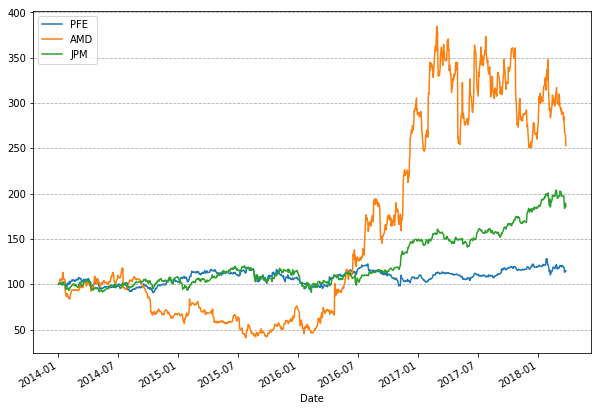

In [7]:
# [Visualize] Plot Data Frame -- Closing Prices
visual_plot = (portfolio/portfolio.iloc[0] * 100).plot(figsize=(10,7))
plt.grid(axis="y", linestyle="dashed")

In [8]:
# Convert Stock Price Data into Log Returns -- Removed Offset Row
log_returns = np.log(portfolio / portfolio.shift(1)).iloc[1:]
log_returns[:15]

,PFE,AMD,JPM
Date,,,
2014-01-03,0.001968,0.012579,0.007701
2014-01-06,0.000982,0.031983,0.005779
2014-01-07,0.006200,0.012034,-0.011592
2014-01-08,0.006808,0.000000,0.009387
2014-01-09,-0.000646,-0.021766,-0.001870
2014-01-10,-0.007790,0.019371,-0.004606
2014-01-13,-0.004900,-0.009639,-0.013599
2014-01-14,0.014950,0.040338,0.000693
2014-01-15,0.005790,0.038773,0.029858


In [9]:
# Calculate Average Annual Log Returns 
log_returns.mean()*250

PFE    0.032711
AMD    0.218249
JPM    0.145594
dtype: float64

In [ ]:
# Portfolio Asset Covariance Matrix
log_returns.cov() * 250

In [10]:
# Portfolio Asset Correlation Matrix
log_returns.corr()

,PFE,AMD,JPM
PFE,1.000000,0.171980,0.460068
AMD,0.171980,1.000000,0.234898
JPM,0.460068,0.234898,1.000000


In [11]:
# Count Number of Assets in Portfolio
num_assets = (len(pfolio_assets) )
num_assets

3

In [12]:
# Simulate 10k Random Portfolios
pfolio_sims = []
pfolio = {}

mkt_return = .098
sim_trials = 2500
for i in range(sim_trials):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    WTSp = zip(pfolio_assets, weights)
    RTNp = np.sum(weights * log_returns.mean()) * 250
    VOLp = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    
    pfolio = {a:round(wt, 4) for a,wt in WTSp}
    pfolio["RTN"] = round(RTNp, 4)
    pfolio["VOL"] = round(VOLp, 4)
    pfolio["Sharpe"] = round((RTNp - mkt_return)/VOLp, 4)
    pfolio_sims.append(pfolio)
    
    print("\n",pfolio, "\n")

print(">>> Data Points Generated -- Simulation Complete <<<")


 {'PFE': 0.5252, 'AMD': 0.4496, 'JPM': 0.0252, 'RTN': 0.119, 'VOL': 0.2993, 'Sharpe': 0.0701} 


 {'PFE': 0.5228, 'AMD': 0.3462, 'JPM': 0.1311, 'RTN': 0.1117, 'VOL': 0.2508, 'Sharpe': 0.0548} 


 {'PFE': 0.4621, 'AMD': 0.4885, 'JPM': 0.0494, 'RTN': 0.1289, 'VOL': 0.3185, 'Sharpe': 0.0971} 


 {'PFE': 0.1496, 'AMD': 0.7316, 'JPM': 0.1188, 'RTN': 0.1819, 'VOL': 0.4479, 'Sharpe': 0.1872} 


 {'PFE': 0.4513, 'AMD': 0.1478, 'JPM': 0.4009, 'RTN': 0.1054, 'VOL': 0.1808, 'Sharpe': 0.0409} 


 {'PFE': 0.0886, 'AMD': 0.5197, 'JPM': 0.3916, 'RTN': 0.1734, 'VOL': 0.3425, 'Sharpe': 0.22} 


 {'PFE': 0.3641, 'AMD': 0.2702, 'JPM': 0.3657, 'RTN': 0.1241, 'VOL': 0.2221, 'Sharpe': 0.1176} 


 {'PFE': 0.001, 'AMD': 0.534, 'JPM': 0.4649, 'RTN': 0.1843, 'VOL': 0.3534, 'Sharpe': 0.2441} 


 {'PFE': 0.2902, 'AMD': 0.4271, 'JPM': 0.2827, 'RTN': 0.1439, 'VOL': 0.2913, 'Sharpe': 0.1574} 


 {'PFE': 0.2252, 'AMD': 0.2889, 'JPM': 0.4859, 'RTN': 0.1412, 'VOL': 0.2354, 'Sharpe': 0.1834} 


 {'PFE': 0.1176, 'AMD': 


 {'PFE': 0.0218, 'AMD': 0.3844, 'JPM': 0.5938, 'RTN': 0.1711, 'VOL': 0.2857, 'Sharpe': 0.2558} 


 {'PFE': 0.636, 'AMD': 0.2544, 'JPM': 0.1096, 'RTN': 0.0923, 'VOL': 0.2132, 'Sharpe': -0.0268} 


 {'PFE': 0.2533, 'AMD': 0.5656, 'JPM': 0.1811, 'RTN': 0.1581, 'VOL': 0.3597, 'Sharpe': 0.1671} 


 {'PFE': 0.3678, 'AMD': 0.1645, 'JPM': 0.4677, 'RTN': 0.116, 'VOL': 0.1883, 'Sharpe': 0.0957} 


 {'PFE': 0.0388, 'AMD': 0.7016, 'JPM': 0.2596, 'RTN': 0.1922, 'VOL': 0.4352, 'Sharpe': 0.2164} 


 {'PFE': 0.3389, 'AMD': 0.2213, 'JPM': 0.4398, 'RTN': 0.1234, 'VOL': 0.2061, 'Sharpe': 0.1233} 


 {'PFE': 0.3192, 'AMD': 0.2471, 'JPM': 0.4337, 'RTN': 0.1275, 'VOL': 0.2156, 'Sharpe': 0.1369} 


 {'PFE': 0.0675, 'AMD': 0.1351, 'JPM': 0.7974, 'RTN': 0.1478, 'VOL': 0.2059, 'Sharpe': 0.2419} 


 {'PFE': 0.2357, 'AMD': 0.2071, 'JPM': 0.5572, 'RTN': 0.134, 'VOL': 0.2076, 'Sharpe': 0.1736} 


 {'PFE': 0.0858, 'AMD': 0.5082, 'JPM': 0.406, 'RTN': 0.1728, 'VOL': 0.3371, 'Sharpe': 0.222} 


 {'PFE': 0.4451, 'AMD':


 {'PFE': 0.2043, 'AMD': 0.4182, 'JPM': 0.3775, 'RTN': 0.1529, 'VOL': 0.2902, 'Sharpe': 0.1892} 


 {'PFE': 0.6957, 'AMD': 0.2246, 'JPM': 0.0797, 'RTN': 0.0834, 'VOL': 0.2032, 'Sharpe': -0.072} 


 {'PFE': 0.5449, 'AMD': 0.0734, 'JPM': 0.3816, 'RTN': 0.0894, 'VOL': 0.1648, 'Sharpe': -0.0521} 


 {'PFE': 0.3222, 'AMD': 0.3763, 'JPM': 0.3015, 'RTN': 0.1366, 'VOL': 0.2672, 'Sharpe': 0.1443} 


 {'PFE': 0.42, 'AMD': 0.1678, 'JPM': 0.4122, 'RTN': 0.1104, 'VOL': 0.1869, 'Sharpe': 0.0662} 


 {'PFE': 0.3117, 'AMD': 0.2228, 'JPM': 0.4654, 'RTN': 0.1266, 'VOL': 0.2079, 'Sharpe': 0.1375} 


 {'PFE': 0.3911, 'AMD': 0.5407, 'JPM': 0.0681, 'RTN': 0.1407, 'VOL': 0.3451, 'Sharpe': 0.1238} 


 {'PFE': 0.5725, 'AMD': 0.272, 'JPM': 0.1555, 'RTN': 0.1007, 'VOL': 0.2195, 'Sharpe': 0.0124} 


 {'PFE': 0.702, 'AMD': 0.2768, 'JPM': 0.0212, 'RTN': 0.0865, 'VOL': 0.2234, 'Sharpe': -0.0516} 


 {'PFE': 0.4612, 'AMD': 0.4237, 'JPM': 0.1151, 'RTN': 0.1243, 'VOL': 0.2868, 'Sharpe': 0.0917} 


 {'PFE': 0.3117, 'AMD


 {'PFE': 0.8389, 'AMD': 0.1115, 'JPM': 0.0496, 'RTN': 0.059, 'VOL': 0.1757, 'Sharpe': -0.2219} 


 {'PFE': 0.0965, 'AMD': 0.5412, 'JPM': 0.3623, 'RTN': 0.174, 'VOL': 0.3525, 'Sharpe': 0.2157} 


 {'PFE': 0.2838, 'AMD': 0.3478, 'JPM': 0.3684, 'RTN': 0.1388, 'VOL': 0.2562, 'Sharpe': 0.1594} 


 {'PFE': 0.587, 'AMD': 0.136, 'JPM': 0.277, 'RTN': 0.0892, 'VOL': 0.1754, 'Sharpe': -0.0501} 


 {'PFE': 0.1709, 'AMD': 0.4314, 'JPM': 0.3977, 'RTN': 0.1576, 'VOL': 0.2976, 'Sharpe': 0.2004} 


 {'PFE': 0.4279, 'AMD': 0.0522, 'JPM': 0.5199, 'RTN': 0.1011, 'VOL': 0.1671, 'Sharpe': 0.0185} 


 {'PFE': 0.7176, 'AMD': 0.1077, 'JPM': 0.1747, 'RTN': 0.0724, 'VOL': 0.1704, 'Sharpe': -0.1501} 


 {'PFE': 0.1824, 'AMD': 0.4154, 'JPM': 0.4021, 'RTN': 0.1552, 'VOL': 0.2899, 'Sharpe': 0.1973} 


 {'PFE': 0.0095, 'AMD': 0.4761, 'JPM': 0.5144, 'RTN': 0.1791, 'VOL': 0.3261, 'Sharpe': 0.2487} 


 {'PFE': 0.1489, 'AMD': 0.4433, 'JPM': 0.4078, 'RTN': 0.161, 'VOL': 0.304, 'Sharpe': 0.2072} 


 {'PFE': 0.0148, 'AMD':

 {'PFE': 0.433, 'AMD': 0.4948, 'JPM': 0.0721, 'RTN': 0.1327, 'VOL': 0.3217, 'Sharpe': 0.1078} 


 {'PFE': 0.4035, 'AMD': 0.4748, 'JPM': 0.1216, 'RTN': 0.1345, 'VOL': 0.312, 'Sharpe': 0.1171} 


 {'PFE': 0.1004, 'AMD': 0.5366, 'JPM': 0.363, 'RTN': 0.1732, 'VOL': 0.3501, 'Sharpe': 0.2149} 


 {'PFE': 0.6232, 'AMD': 0.0584, 'JPM': 0.3184, 'RTN': 0.0795, 'VOL': 0.1622, 'Sharpe': -0.1141} 


 {'PFE': 0.3943, 'AMD': 0.318, 'JPM': 0.2877, 'RTN': 0.1242, 'VOL': 0.2402, 'Sharpe': 0.109} 


 {'PFE': 0.062, 'AMD': 0.6025, 'JPM': 0.3355, 'RTN': 0.1824, 'VOL': 0.3841, 'Sharpe': 0.2197} 


 {'PFE': 0.3176, 'AMD': 0.602, 'JPM': 0.0804, 'RTN': 0.1535, 'VOL': 0.3773, 'Sharpe': 0.147} 


 {'PFE': 0.3685, 'AMD': 0.3453, 'JPM': 0.2862, 'RTN': 0.1291, 'VOL': 0.2524, 'Sharpe': 0.1232} 


 {'PFE': 0.4259, 'AMD': 0.3223, 'JPM': 0.2518, 'RTN': 0.1209, 'VOL': 0.2414, 'Sharpe': 0.095} 


 {'PFE': 0.0586, 'AMD': 0.6271, 'JPM': 0.3143, 'RTN': 0.1845, 'VOL': 0.3965, 'Sharpe': 0.2183} 


 {'PFE': 0.1408, 'AMD': 0.35

 {'PFE': 0.2261, 'AMD': 0.4322, 'JPM': 0.3417, 'RTN': 0.1515, 'VOL': 0.2957, 'Sharpe': 0.1808} 


 {'PFE': 0.6053, 'AMD': 0.1187, 'JPM': 0.276, 'RTN': 0.0859, 'VOL': 0.1715, 'Sharpe': -0.0706} 


 {'PFE': 0.1998, 'AMD': 0.5333, 'JPM': 0.2669, 'RTN': 0.1618, 'VOL': 0.3449, 'Sharpe': 0.1849} 


 {'PFE': 0.2311, 'AMD': 0.566, 'JPM': 0.2029, 'RTN': 0.1606, 'VOL': 0.3604, 'Sharpe': 0.1738} 


 {'PFE': 0.3266, 'AMD': 0.2842, 'JPM': 0.3892, 'RTN': 0.1294, 'VOL': 0.2288, 'Sharpe': 0.1371} 


 {'PFE': 0.3843, 'AMD': 0.4157, 'JPM': 0.2, 'RTN': 0.1324, 'VOL': 0.2838, 'Sharpe': 0.1212} 


 {'PFE': 0.133, 'AMD': 0.6119, 'JPM': 0.2551, 'RTN': 0.175, 'VOL': 0.3863, 'Sharpe': 0.1994} 


 {'PFE': 0.7205, 'AMD': 0.1951, 'JPM': 0.0844, 'RTN': 0.0784, 'VOL': 0.1937, 'Sharpe': -0.101} 


 {'PFE': 0.085, 'AMD': 0.6285, 'JPM': 0.2865, 'RTN': 0.1817, 'VOL': 0.3963, 'Sharpe': 0.2111} 


 {'PFE': 0.0618, 'AMD': 0.9076, 'JPM': 0.0307, 'RTN': 0.2046, 'VOL': 0.544, 'Sharpe': 0.1959} 


 {'PFE': 0.4769, 'AMD': 0.37

 {'PFE': 0.1024, 'AMD': 0.5243, 'JPM': 0.3733, 'RTN': 0.1721, 'VOL': 0.344, 'Sharpe': 0.2154} 


 {'PFE': 0.3606, 'AMD': 0.4542, 'JPM': 0.1851, 'RTN': 0.1379, 'VOL': 0.3026, 'Sharpe': 0.1318} 


 {'PFE': 0.0023, 'AMD': 0.5087, 'JPM': 0.4889, 'RTN': 0.1823, 'VOL': 0.3415, 'Sharpe': 0.2468} 


 {'PFE': 0.2708, 'AMD': 0.0796, 'JPM': 0.6497, 'RTN': 0.1208, 'VOL': 0.1797, 'Sharpe': 0.127} 


 {'PFE': 0.4722, 'AMD': 0.5167, 'JPM': 0.0111, 'RTN': 0.1298, 'VOL': 0.3326, 'Sharpe': 0.0957} 


 {'PFE': 0.501, 'AMD': 0.4127, 'JPM': 0.0864, 'RTN': 0.119, 'VOL': 0.2814, 'Sharpe': 0.0747} 


 {'PFE': 0.8759, 'AMD': 0.0329, 'JPM': 0.0911, 'RTN': 0.0491, 'VOL': 0.1669, 'Sharpe': -0.293} 


 {'PFE': 0.1483, 'AMD': 0.5359, 'JPM': 0.3158, 'RTN': 0.1678, 'VOL': 0.3479, 'Sharpe': 0.2006} 


 {'PFE': 0.4131, 'AMD': 0.5782, 'JPM': 0.0087, 'RTN': 0.141, 'VOL': 0.3643, 'Sharpe': 0.118} 


 {'PFE': 0.3493, 'AMD': 0.4602, 'JPM': 0.1905, 'RTN': 0.1396, 'VOL': 0.3056, 'Sharpe': 0.1361} 


 {'PFE': 0.1679, 'AMD': 0.

 {'PFE': 0.4304, 'AMD': 0.3263, 'JPM': 0.2433, 'RTN': 0.1207, 'VOL': 0.2429, 'Sharpe': 0.0935} 


 {'PFE': 0.2187, 'AMD': 0.3833, 'JPM': 0.398, 'RTN': 0.1487, 'VOL': 0.2741, 'Sharpe': 0.1852} 


 {'PFE': 0.3009, 'AMD': 0.3156, 'JPM': 0.3836, 'RTN': 0.1346, 'VOL': 0.2422, 'Sharpe': 0.1509} 


 {'PFE': 0.4223, 'AMD': 0.0372, 'JPM': 0.5404, 'RTN': 0.1006, 'VOL': 0.1667, 'Sharpe': 0.0157} 


 {'PFE': 0.2452, 'AMD': 0.3575, 'JPM': 0.3972, 'RTN': 0.1439, 'VOL': 0.2619, 'Sharpe': 0.1752} 


 {'PFE': 0.4142, 'AMD': 0.4182, 'JPM': 0.1676, 'RTN': 0.1292, 'VOL': 0.2846, 'Sharpe': 0.1097} 


 {'PFE': 0.4084, 'AMD': 0.1719, 'JPM': 0.4197, 'RTN': 0.112, 'VOL': 0.1885, 'Sharpe': 0.0742} 


 {'PFE': 0.4058, 'AMD': 0.1991, 'JPM': 0.3951, 'RTN': 0.1143, 'VOL': 0.1964, 'Sharpe': 0.0828} 


 {'PFE': 0.2458, 'AMD': 0.3634, 'JPM': 0.3908, 'RTN': 0.1442, 'VOL': 0.2643, 'Sharpe': 0.1749} 


 {'PFE': 0.3795, 'AMD': 0.1828, 'JPM': 0.4377, 'RTN': 0.116, 'VOL': 0.1927, 'Sharpe': 0.0936} 


 {'PFE': 0.4591, 'AMD':


 {'PFE': 0.2936, 'AMD': 0.2659, 'JPM': 0.4405, 'RTN': 0.1318, 'VOL': 0.2235, 'Sharpe': 0.1511} 


 {'PFE': 0.3227, 'AMD': 0.5758, 'JPM': 0.1015, 'RTN': 0.151, 'VOL': 0.3637, 'Sharpe': 0.1457} 


 {'PFE': 0.5546, 'AMD': 0.3082, 'JPM': 0.1373, 'RTN': 0.1054, 'VOL': 0.2343, 'Sharpe': 0.0315} 


 {'PFE': 0.4112, 'AMD': 0.2969, 'JPM': 0.292, 'RTN': 0.1208, 'VOL': 0.2312, 'Sharpe': 0.0984} 


 {'PFE': 0.168, 'AMD': 0.4016, 'JPM': 0.4304, 'RTN': 0.1558, 'VOL': 0.2844, 'Sharpe': 0.2033} 


 {'PFE': 0.0424, 'AMD': 0.4803, 'JPM': 0.4773, 'RTN': 0.1757, 'VOL': 0.3262, 'Sharpe': 0.2382} 


 {'PFE': 0.393, 'AMD': 0.5821, 'JPM': 0.0249, 'RTN': 0.1435, 'VOL': 0.3663, 'Sharpe': 0.1243} 


 {'PFE': 0.1965, 'AMD': 0.466, 'JPM': 0.3375, 'RTN': 0.1573, 'VOL': 0.3126, 'Sharpe': 0.1896} 


 {'PFE': 0.4448, 'AMD': 0.3141, 'JPM': 0.2411, 'RTN': 0.1182, 'VOL': 0.2376, 'Sharpe': 0.0851} 


 {'PFE': 0.3891, 'AMD': 0.211, 'JPM': 0.3998, 'RTN': 0.117, 'VOL': 0.2007, 'Sharpe': 0.0947} 


 {'PFE': 0.3781, 'AMD': 0.


 {'PFE': 0.3252, 'AMD': 0.2598, 'JPM': 0.415, 'RTN': 0.1278, 'VOL': 0.2198, 'Sharpe': 0.1354} 


 {'PFE': 0.881, 'AMD': 0.0925, 'JPM': 0.0265, 'RTN': 0.0529, 'VOL': 0.1744, 'Sharpe': -0.2589} 


 {'PFE': 0.2656, 'AMD': 0.3455, 'JPM': 0.3889, 'RTN': 0.1407, 'VOL': 0.2559, 'Sharpe': 0.1669} 


 {'PFE': 0.5927, 'AMD': 0.2069, 'JPM': 0.2004, 'RTN': 0.0937, 'VOL': 0.1957, 'Sharpe': -0.0219} 


 {'PFE': 0.6176, 'AMD': 0.2116, 'JPM': 0.1708, 'RTN': 0.0912, 'VOL': 0.1974, 'Sharpe': -0.0342} 


 {'PFE': 0.2007, 'AMD': 0.167, 'JPM': 0.6324, 'RTN': 0.1351, 'VOL': 0.1997, 'Sharpe': 0.1856} 


 {'PFE': 0.4661, 'AMD': 0.0655, 'JPM': 0.4685, 'RTN': 0.0977, 'VOL': 0.1664, 'Sharpe': -0.0016} 


 {'PFE': 0.1914, 'AMD': 0.0769, 'JPM': 0.7316, 'RTN': 0.1296, 'VOL': 0.1864, 'Sharpe': 0.1694} 


 {'PFE': 0.2994, 'AMD': 0.2509, 'JPM': 0.4497, 'RTN': 0.13, 'VOL': 0.2179, 'Sharpe': 0.147} 


 {'PFE': 0.2862, 'AMD': 0.4958, 'JPM': 0.218, 'RTN': 0.1493, 'VOL': 0.3242, 'Sharpe': 0.1583} 


 {'PFE': 0.0072, 'AMD'

 {'PFE': 0.1498, 'AMD': 0.5, 'JPM': 0.3502, 'RTN': 0.165, 'VOL': 0.3305, 'Sharpe': 0.2028} 


 {'PFE': 0.6333, 'AMD': 0.105, 'JPM': 0.2616, 'RTN': 0.0817, 'VOL': 0.1688, 'Sharpe': -0.0963} 


 {'PFE': 0.1538, 'AMD': 0.1847, 'JPM': 0.6615, 'RTN': 0.1417, 'VOL': 0.2078, 'Sharpe': 0.2101} 


 {'PFE': 0.2411, 'AMD': 0.3736, 'JPM': 0.3854, 'RTN': 0.1455, 'VOL': 0.2689, 'Sharpe': 0.1767} 


 {'PFE': 0.0971, 'AMD': 0.1635, 'JPM': 0.7394, 'RTN': 0.1465, 'VOL': 0.2081, 'Sharpe': 0.2331} 


 {'PFE': 0.3906, 'AMD': 0.3119, 'JPM': 0.2975, 'RTN': 0.1242, 'VOL': 0.2378, 'Sharpe': 0.11} 


 {'PFE': 0.2905, 'AMD': 0.4938, 'JPM': 0.2157, 'RTN': 0.1487, 'VOL': 0.3231, 'Sharpe': 0.1568} 


 {'PFE': 0.2198, 'AMD': 0.3942, 'JPM': 0.386, 'RTN': 0.1494, 'VOL': 0.2788, 'Sharpe': 0.1844} 


 {'PFE': 0.4445, 'AMD': 0.1515, 'JPM': 0.404, 'RTN': 0.1064, 'VOL': 0.1819, 'Sharpe': 0.0463} 


 {'PFE': 0.1816, 'AMD': 0.5214, 'JPM': 0.297, 'RTN': 0.163, 'VOL': 0.3397, 'Sharpe': 0.1913} 


 {'PFE': 0.0891, 'AMD': 0.2941


 {'PFE': 0.2832, 'AMD': 0.3796, 'JPM': 0.3372, 'RTN': 0.1412, 'VOL': 0.27, 'Sharpe': 0.16} 


 {'PFE': 0.1933, 'AMD': 0.3016, 'JPM': 0.505, 'RTN': 0.1457, 'VOL': 0.242, 'Sharpe': 0.197} 


 {'PFE': 0.2495, 'AMD': 0.3285, 'JPM': 0.422, 'RTN': 0.1413, 'VOL': 0.2496, 'Sharpe': 0.1735} 


 {'PFE': 0.5318, 'AMD': 0.0051, 'JPM': 0.4631, 'RTN': 0.0859, 'VOL': 0.162, 'Sharpe': -0.0744} 


 {'PFE': 0.2233, 'AMD': 0.2173, 'JPM': 0.5595, 'RTN': 0.1362, 'VOL': 0.2114, 'Sharpe': 0.1806} 


 {'PFE': 0.2169, 'AMD': 0.6285, 'JPM': 0.1546, 'RTN': 0.1668, 'VOL': 0.3927, 'Sharpe': 0.1751} 


 {'PFE': 0.0065, 'AMD': 0.9475, 'JPM': 0.046, 'RTN': 0.2137, 'VOL': 0.5668, 'Sharpe': 0.2041} 


 {'PFE': 0.0265, 'AMD': 0.3492, 'JPM': 0.6244, 'RTN': 0.168, 'VOL': 0.2713, 'Sharpe': 0.2579} 


 {'PFE': 0.1438, 'AMD': 0.7893, 'JPM': 0.0669, 'RTN': 0.1867, 'VOL': 0.4788, 'Sharpe': 0.1853} 


 {'PFE': 0.1687, 'AMD': 0.7698, 'JPM': 0.0615, 'RTN': 0.1825, 'VOL': 0.4679, 'Sharpe': 0.1805} 


 {'PFE': 0.2247, 'AMD': 0.362


 {'PFE': 0.3849, 'AMD': 0.2078, 'JPM': 0.4073, 'RTN': 0.1172, 'VOL': 0.1998, 'Sharpe': 0.0963} 


 {'PFE': 0.0875, 'AMD': 0.0428, 'JPM': 0.8697, 'RTN': 0.1388, 'VOL': 0.1957, 'Sharpe': 0.2086} 


 {'PFE': 0.1542, 'AMD': 0.5764, 'JPM': 0.2695, 'RTN': 0.1701, 'VOL': 0.3678, 'Sharpe': 0.196} 


 {'PFE': 0.5955, 'AMD': 0.3516, 'JPM': 0.0529, 'RTN': 0.1039, 'VOL': 0.2536, 'Sharpe': 0.0233} 


 {'PFE': 0.4353, 'AMD': 0.097, 'JPM': 0.4677, 'RTN': 0.1035, 'VOL': 0.1715, 'Sharpe': 0.0321} 


 {'PFE': 0.2643, 'AMD': 0.4665, 'JPM': 0.2692, 'RTN': 0.1497, 'VOL': 0.3106, 'Sharpe': 0.1663} 


 {'PFE': 0.2401, 'AMD': 0.2438, 'JPM': 0.5161, 'RTN': 0.1362, 'VOL': 0.2187, 'Sharpe': 0.1747} 


 {'PFE': 0.481, 'AMD': 0.0346, 'JPM': 0.4844, 'RTN': 0.0938, 'VOL': 0.1639, 'Sharpe': -0.0256} 


 {'PFE': 0.2067, 'AMD': 0.4959, 'JPM': 0.2974, 'RTN': 0.1583, 'VOL': 0.3265, 'Sharpe': 0.1847} 


 {'PFE': 0.2204, 'AMD': 0.2639, 'JPM': 0.5156, 'RTN': 0.1399, 'VOL': 0.2267, 'Sharpe': 0.1848} 


 {'PFE': 0.2721, 'AMD


 {'PFE': 0.4324, 'AMD': 0.0199, 'JPM': 0.5478, 'RTN': 0.0982, 'VOL': 0.166, 'Sharpe': 0.0014} 


 {'PFE': 0.1975, 'AMD': 0.4357, 'JPM': 0.3668, 'RTN': 0.155, 'VOL': 0.2984, 'Sharpe': 0.1908} 


 {'PFE': 0.4546, 'AMD': 0.1337, 'JPM': 0.4117, 'RTN': 0.104, 'VOL': 0.1775, 'Sharpe': 0.0338} 


 {'PFE': 0.3208, 'AMD': 0.2025, 'JPM': 0.4767, 'RTN': 0.1241, 'VOL': 0.2012, 'Sharpe': 0.1297} 


 {'PFE': 0.2986, 'AMD': 0.2239, 'JPM': 0.4775, 'RTN': 0.1282, 'VOL': 0.2089, 'Sharpe': 0.1444} 


 {'PFE': 0.2795, 'AMD': 0.2824, 'JPM': 0.4381, 'RTN': 0.1346, 'VOL': 0.2302, 'Sharpe': 0.1588} 


 {'PFE': 0.3257, 'AMD': 0.3304, 'JPM': 0.3439, 'RTN': 0.1328, 'VOL': 0.2474, 'Sharpe': 0.1408} 


 {'PFE': 0.0585, 'AMD': 0.7206, 'JPM': 0.2209, 'RTN': 0.1913, 'VOL': 0.4445, 'Sharpe': 0.21} 


 {'PFE': 0.3471, 'AMD': 0.1002, 'JPM': 0.5528, 'RTN': 0.1137, 'VOL': 0.1767, 'Sharpe': 0.0888} 


 {'PFE': 0.4327, 'AMD': 0.1461, 'JPM': 0.4212, 'RTN': 0.1074, 'VOL': 0.181, 'Sharpe': 0.0517} 


 {'PFE': 0.396, 'AMD': 0.

 {'PFE': 0.1997, 'AMD': 0.467, 'JPM': 0.3333, 'RTN': 0.157, 'VOL': 0.3129, 'Sharpe': 0.1885} 


 {'PFE': 0.1119, 'AMD': 0.4339, 'JPM': 0.4542, 'RTN': 0.1645, 'VOL': 0.3015, 'Sharpe': 0.2205} 


 {'PFE': 0.406, 'AMD': 0.3132, 'JPM': 0.2808, 'RTN': 0.1225, 'VOL': 0.2379, 'Sharpe': 0.103} 


 {'PFE': 0.4945, 'AMD': 0.2708, 'JPM': 0.2348, 'RTN': 0.1095, 'VOL': 0.2194, 'Sharpe': 0.0522} 


 {'PFE': 0.5183, 'AMD': 0.1142, 'JPM': 0.3675, 'RTN': 0.0954, 'VOL': 0.1717, 'Sharpe': -0.0152} 


 {'PFE': 0.3378, 'AMD': 0.1771, 'JPM': 0.4851, 'RTN': 0.1203, 'VOL': 0.1931, 'Sharpe': 0.1156} 


 {'PFE': 0.3429, 'AMD': 0.4402, 'JPM': 0.2169, 'RTN': 0.1389, 'VOL': 0.2962, 'Sharpe': 0.138} 


 {'PFE': 0.4609, 'AMD': 0.3901, 'JPM': 0.149, 'RTN': 0.1219, 'VOL': 0.271, 'Sharpe': 0.0882} 


 {'PFE': 0.3462, 'AMD': 0.0538, 'JPM': 0.6, 'RTN': 0.1104, 'VOL': 0.1721, 'Sharpe': 0.0722} 


 {'PFE': 0.177, 'AMD': 0.4649, 'JPM': 0.358, 'RTN': 0.1594, 'VOL': 0.3128, 'Sharpe': 0.1963} 


 {'PFE': 0.271, 'AMD': 0.3646, 


 {'PFE': 0.347, 'AMD': 0.5108, 'JPM': 0.1422, 'RTN': 0.1435, 'VOL': 0.3305, 'Sharpe': 0.1378} 


 {'PFE': 0.1963, 'AMD': 0.4501, 'JPM': 0.3536, 'RTN': 0.1561, 'VOL': 0.3051, 'Sharpe': 0.1905} 


 {'PFE': 0.3959, 'AMD': 0.3772, 'JPM': 0.2269, 'RTN': 0.1283, 'VOL': 0.2659, 'Sharpe': 0.114} 


 {'PFE': 0.4187, 'AMD': 0.2249, 'JPM': 0.3564, 'RTN': 0.1147, 'VOL': 0.2042, 'Sharpe': 0.0816} 


 {'PFE': 0.5083, 'AMD': 0.1812, 'JPM': 0.3105, 'RTN': 0.1014, 'VOL': 0.1882, 'Sharpe': 0.018} 


 {'PFE': 0.0821, 'AMD': 0.2161, 'JPM': 0.7018, 'RTN': 0.152, 'VOL': 0.2221, 'Sharpe': 0.2432} 


 {'PFE': 0.5208, 'AMD': 0.366, 'JPM': 0.1132, 'RTN': 0.1134, 'VOL': 0.2597, 'Sharpe': 0.0593} 


 {'PFE': 0.2266, 'AMD': 0.5493, 'JPM': 0.2241, 'RTN': 0.1599, 'VOL': 0.3522, 'Sharpe': 0.1758} 


 {'PFE': 0.4755, 'AMD': 0.1846, 'JPM': 0.3398, 'RTN': 0.1053, 'VOL': 0.1899, 'Sharpe': 0.0386} 


 {'PFE': 0.3307, 'AMD': 0.3625, 'JPM': 0.3068, 'RTN': 0.1346, 'VOL': 0.2609, 'Sharpe': 0.1403} 


 {'PFE': 0.6276, 'AMD': 


 {'PFE': 0.3846, 'AMD': 0.5425, 'JPM': 0.0729, 'RTN': 0.1416, 'VOL': 0.3461, 'Sharpe': 0.126} 


 {'PFE': 0.2192, 'AMD': 0.3268, 'JPM': 0.454, 'RTN': 0.1446, 'VOL': 0.2504, 'Sharpe': 0.1861} 


 {'PFE': 0.5874, 'AMD': 0.4026, 'JPM': 0.01, 'RTN': 0.1085, 'VOL': 0.2771, 'Sharpe': 0.038} 


 {'PFE': 0.4855, 'AMD': 0.3386, 'JPM': 0.1759, 'RTN': 0.1154, 'VOL': 0.2476, 'Sharpe': 0.0703} 


 {'PFE': 0.3707, 'AMD': 0.4101, 'JPM': 0.2192, 'RTN': 0.1335, 'VOL': 0.2815, 'Sharpe': 0.1263} 


 {'PFE': 0.2532, 'AMD': 0.3629, 'JPM': 0.3839, 'RTN': 0.1434, 'VOL': 0.2638, 'Sharpe': 0.172} 


 {'PFE': 0.3936, 'AMD': 0.3115, 'JPM': 0.2949, 'RTN': 0.1238, 'VOL': 0.2375, 'Sharpe': 0.1086} 


 {'PFE': 0.3477, 'AMD': 0.3117, 'JPM': 0.3406, 'RTN': 0.129, 'VOL': 0.2389, 'Sharpe': 0.1297} 


 {'PFE': 0.1632, 'AMD': 0.2568, 'JPM': 0.58, 'RTN': 0.1458, 'VOL': 0.228, 'Sharpe': 0.2098} 


 {'PFE': 0.1592, 'AMD': 0.1356, 'JPM': 0.7052, 'RTN': 0.1375, 'VOL': 0.1969, 'Sharpe': 0.2005} 


 {'PFE': 0.8569, 'AMD': 0.117


 {'PFE': 0.1167, 'AMD': 0.4517, 'JPM': 0.4316, 'RTN': 0.1652, 'VOL': 0.3093, 'Sharpe': 0.2174} 


 {'PFE': 0.0508, 'AMD': 0.3416, 'JPM': 0.6075, 'RTN': 0.1647, 'VOL': 0.2666, 'Sharpe': 0.2501} 


 {'PFE': 0.0214, 'AMD': 0.2912, 'JPM': 0.6873, 'RTN': 0.1643, 'VOL': 0.2506, 'Sharpe': 0.2647} 


 {'PFE': 0.5258, 'AMD': 0.4317, 'JPM': 0.0424, 'RTN': 0.1176, 'VOL': 0.2906, 'Sharpe': 0.0675} 


 {'PFE': 0.4395, 'AMD': 0.3694, 'JPM': 0.1911, 'RTN': 0.1228, 'VOL': 0.2617, 'Sharpe': 0.0948} 


 {'PFE': 0.5156, 'AMD': 0.3519, 'JPM': 0.1325, 'RTN': 0.113, 'VOL': 0.2533, 'Sharpe': 0.059} 


 {'PFE': 0.0414, 'AMD': 0.261, 'JPM': 0.6975, 'RTN': 0.1599, 'VOL': 0.239, 'Sharpe': 0.259} 


 {'PFE': 0.6336, 'AMD': 0.031, 'JPM': 0.3353, 'RTN': 0.0763, 'VOL': 0.1604, 'Sharpe': -0.1352} 


 {'PFE': 0.0275, 'AMD': 0.327, 'JPM': 0.6456, 'RTN': 0.1662, 'VOL': 0.2628, 'Sharpe': 0.2597} 


 {'PFE': 0.5084, 'AMD': 0.0309, 'JPM': 0.4607, 'RTN': 0.0905, 'VOL': 0.1628, 'Sharpe': -0.0464} 


 {'PFE': 0.5056, 'AMD': 


 {'PFE': 0.4515, 'AMD': 0.1873, 'JPM': 0.3612, 'RTN': 0.1082, 'VOL': 0.1913, 'Sharpe': 0.0535} 


 {'PFE': 0.173, 'AMD': 0.3749, 'JPM': 0.4521, 'RTN': 0.1533, 'VOL': 0.2726, 'Sharpe': 0.2028} 


 {'PFE': 0.1166, 'AMD': 0.5441, 'JPM': 0.3393, 'RTN': 0.172, 'VOL': 0.3531, 'Sharpe': 0.2095} 


 {'PFE': 0.6079, 'AMD': 0.2488, 'JPM': 0.1433, 'RTN': 0.0951, 'VOL': 0.2107, 'Sharpe': -0.014} 


 {'PFE': 0.3369, 'AMD': 0.5414, 'JPM': 0.1216, 'RTN': 0.1469, 'VOL': 0.346, 'Sharpe': 0.1413} 


 {'PFE': 0.0596, 'AMD': 0.3412, 'JPM': 0.5992, 'RTN': 0.1637, 'VOL': 0.2658, 'Sharpe': 0.247} 


 {'PFE': 0.4184, 'AMD': 0.4039, 'JPM': 0.1778, 'RTN': 0.1277, 'VOL': 0.2778, 'Sharpe': 0.1069} 


 {'PFE': 0.0158, 'AMD': 0.6459, 'JPM': 0.3383, 'RTN': 0.1907, 'VOL': 0.4076, 'Sharpe': 0.2275} 


 {'PFE': 0.0088, 'AMD': 0.6268, 'JPM': 0.3644, 'RTN': 0.1901, 'VOL': 0.3983, 'Sharpe': 0.2313} 


 {'PFE': 0.0096, 'AMD': 0.8233, 'JPM': 0.1671, 'RTN': 0.2043, 'VOL': 0.4999, 'Sharpe': 0.2127} 


 {'PFE': 0.7535, 'AMD':

In [13]:
# Convert to DataFrame
portfolios = pd.DataFrame(pfolio_sims)
portfolios.head()

,AMD,JPM,PFE,RTN,Sharpe,VOL
0,0.4496,0.0252,0.5252,0.1190,0.0701,0.2993
1,0.3462,0.1311,0.5228,0.1117,0.0548,0.2508
2,0.4885,0.0494,0.4621,0.1289,0.0971,0.3185
3,0.7316,0.1188,0.1496,0.1819,0.1872,0.4479
4,0.1478,0.4009,0.4513,0.1054,0.0409,0.1808


In [14]:
# View Simulation Summary Statistics
portfolios[["Sharpe", "RTN", "VOL"]].describe()

,Sharpe,RTN,VOL
count,2500.000000,2500.000000,2500.000000
mean,0.119656,0.133463,0.262553
std,0.098445,0.028703,0.073621
min,-0.351300,0.038000,0.160000
25%,0.080100,0.115400,0.205100
50%,0.139200,0.134300,0.252900
75%,0.188825,0.152650,0.304825
max,0.268800,0.215900,0.587100


In [15]:
# Sort Simulated Portfolios: (Sharpe Ratio/Descending)
ranked_portfolios = portfolios.sort_values("Sharpe", ascending=False) \
                    .set_index(["Sharpe", "RTN", "VOL"])

In [16]:
# View Best Portfolios (Most Efficient)
ranked_portfolios.head(10)

AMD     JPM     PFE
Sharpe RTN    VOL                           
0.2688 0.1610 0.2344  0.2384  0.7446  0.0170
0.2670 0.1620 0.2397  0.2574  0.7223  0.0203
0.2650 0.1545 0.2133  0.1456  0.8399  0.0145
0.2647 0.1643 0.2506  0.2912  0.6873  0.0214
0.2622 0.1673 0.2642  0.3291  0.6511  0.0198
0.2621 0.1718 0.2815  0.3715  0.6212  0.0073
       0.1724 0.2839  0.3771  0.6178  0.0051
0.2617 0.1721 0.2832  0.3757  0.6173  0.0070
0.2603 0.1636 0.2519  0.2978  0.6700  0.0322
0.2597 0.1662 0.2628  0.3270  0.6456  0.0275

In [17]:
# View Worst Portfolios (Least Efficient)
ranked_portfolios.tail(10)

,,,AMD,JPM,PFE
Sharpe,RTN,VOL,,,
-0.2930,0.0491,0.1669,0.0329,0.0911,0.8759
-0.2937,0.0488,0.1675,0.0373,0.0812,0.8814
-0.2959,0.0486,0.1670,0.0319,0.0880,0.8801
-0.3041,0.0467,0.1686,0.0373,0.0629,0.8997
-0.3043,0.0470,0.1675,0.0281,0.0808,0.8911
-0.3056,0.0473,0.1658,0.0045,0.1222,0.8733
-0.3348,0.0416,0.1686,0.0011,0.0765,0.9224
-0.3415,0.0396,0.1710,0.0205,0.0272,0.9523
-0.3445,0.0385,0.1726,0.0295,0.0032,0.9673


In [18]:
# Create DataFrames (Best Portfolios, Worst Portfolios, Remaining)
req_headers = ["Sharpe", "RTN", "VOL"]
efficient_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[:50]
remaining_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[950:]
all_pfolios = ranked_portfolios.reset_index()[req_headers]

(-0.1, 0.25)

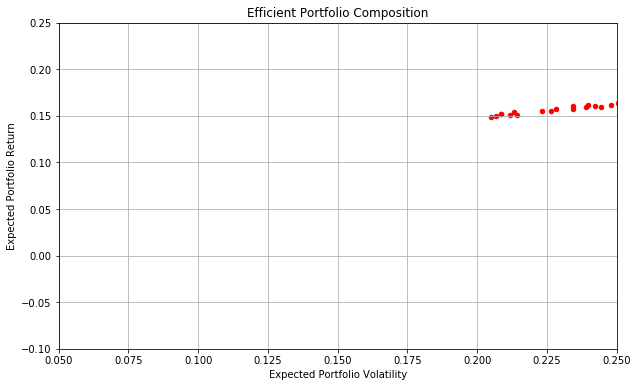

In [19]:
efficient_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="red",
    figsize=(10,6)
)
plt.grid(True)
plt.title("Efficient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.05,.25)
plt.ylim(-.1, .25)


(-0.0, 0.25)

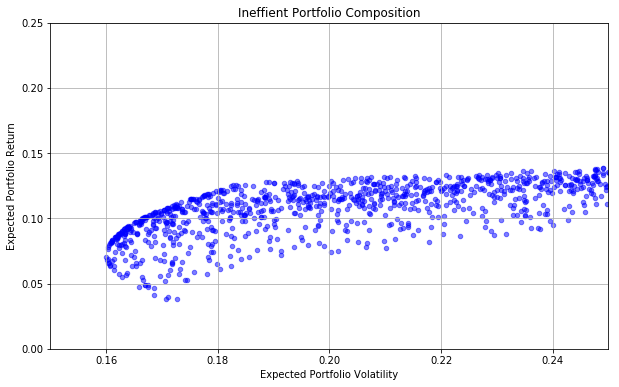

In [20]:
remaining_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="blue",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.15,.25)
plt.ylim(-.0, .25)

(0, 0.2)

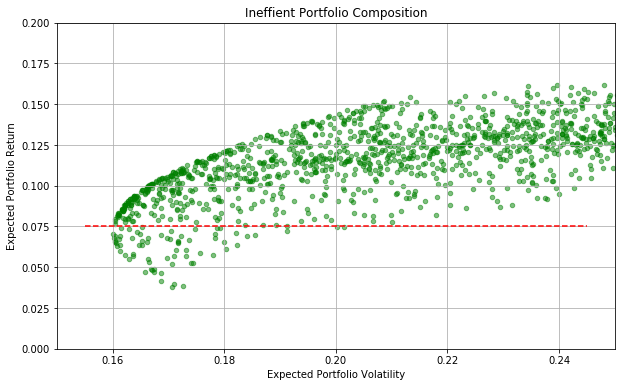

In [21]:
all_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="green",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.hlines(0.075, .155, .245, linestyle="dashed", color="red")
plt.xlim(.15,.25)
plt.ylim(-0, .2)